In [34]:
class Car:
    def drive_car(self):
        print("driving a car!")
    color='blue'
    
    def paint_color(self, color):
        self.car_color=color
        self.color=color
    
    

In [35]:
Car.color

'blue'

In [36]:
my_car=Car()

In [37]:
my_car.color

'blue'

In [38]:
my_car.paint_color('red')
my_car.color

'red'

In [39]:
class BankAccount:
    def __init__(self, money):
        self.balance=money

In [109]:
class Car:
    def __init__(self, color, model):
        self.color=color
        self.model=model
        self.engine='off'
    def start_engine(self):
        if self.engine=='off':
            print('Start Engine!')
            self.engine='On'
        else:
            print("engine is already running")
    def stop_engine(self):
        if self.engine=='On':
            print("Stopping engine!")
            self.engine='Off'
        else:
            print("engine is already off")
    def drive(self):
        if self.engine=='On':
            print("driving the car!")
        else: 
            print("start the engine first")
    def display_car(self):
        print(self.color)
        print(self.model)
        print("The engine is" + " "+self.engine)
    
    
        

In [81]:
my_car=Car('beige','lexus')

In [82]:
my_car.model

'lexus'

In [83]:
my_car.color

'beige'

In [84]:
my_car.display_car()

beige
lexus
The engine is off


In [120]:
class Lexus_car(Car):
    model='lexus'
    color='beige'

In [111]:
car=Lexus_car('beige','lexus')

In [112]:
car.start_engine()

Start Engine!


In [116]:
car.stop_engine()

engine is already off


In [119]:
car.model

'lexus'

In [122]:
Lexus_car.model

'lexus'

In [123]:
class BlueCar:
    color='blue'

In [140]:
class Contact:
    def __init__(self, first_name, last_name):
        self.first_name=first_name
        self.last_name=last_name
        self.full_info=first_name+" "+last_name
        
    def print_contact(self):
        print(self.full_info)

In [141]:
class EmailContact(Contact):
    def __init__(self, first_name, last_name, email):
        super().__init__(first_name, last_name)
        self.email=email
        self.full_info=email
           

In [142]:
email_contact=EmailContact('fn','ln','fn.ln@person.com')

In [143]:
email_contact.print_contact()

fn.ln@person.com


In [144]:
import math

In [145]:
math.pi

3.141592653589793

In [146]:
math.factorial(12)

479001600

In [157]:
import math 
def nCr(n,r):
    f=math.factorial
    return f(n)//(f(r)*f(n-r))



In [158]:
nCr(6,4)

15

In [159]:
nCr(6,1)

6

In [186]:
import scipy
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
mu1, sig1=178, 7.7
man_height=scipy.stats.norm(mu1,sig1)

mu2, sig2=163, 6.6
woman_height=scipy.stats.norm(mu2, sig2)

In [194]:
def pdf_eval(rv, num=4):
    mean, std=rv.mean(), rv.std()
    xs=np.linspace(mean - num*std, mean + num*std, 100)
    ys=rv.pdf(xs)
    return xs, ys

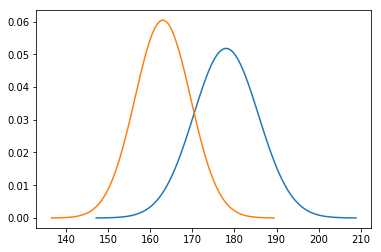

In [196]:
xs, ys=pdf_eval(man_height)
plt.plot(xs,ys)
xs, ys=pdf_eval(woman_height)
plt.plot(xs,ys)

In [197]:
man_sample=man_height.rvs(1000)

In [198]:
woman_sample=woman_height.rvs(1000)

In [199]:
sum(1 for i,j in zip(man_sample,woman_sample) if i>j)/1000

0.947

In [200]:
weight=scipy.stats.lognorm(0.23, 0, 70.8)

In [222]:
weight.mean(), weight.std()

(72.697645732966876, 16.944043048498038)

In [202]:
xs=np.linspace(20,160,100)
ys=weight.pdf(xs)

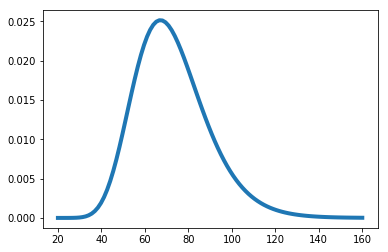

In [206]:
plt.plot(xs, ys, linewidth=4)

In [208]:
def make_sample(n=100):
    sample=weight.rvs(n)
    return sample

In [232]:
sample=make_sample(n=180)
sample.mean(), sample.std()

(73.065974404822441, 17.74665291153844)

In [243]:
def sample_stat(sample):
    return sample.mean()

def make_iteration(num_sample, iterations):
    return np.array([sample_stat(make_sample(n=num_sample)) for i in range(iterations)])

make_iteration(100, 1000).mean()

72.813999773317434

In [244]:
class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = numpy.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean()
    
    def compute_sampling_distribution(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return numpy.array(stats)
    
    def plot_sampling_distribution(self):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = numpy.percentile(sample_stats, [5, 95])
    
        pyplot.hist(sample_stats, color=COLOR2)
        pyplot.xlabel('sample statistic')
        pyplot.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
        text(0.03, 0.85, 'SE %0.2f' % se)
        pyplot.show()

In [248]:
help(Resampler.plot_sampling_distribution)

Help on function plot_sampling_distribution in module __main__:

plot_sampling_distribution(self)
    Plots the sampling distribution.

